In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\rejee\Desktop\MSC_Individual_project\Agitation.csv')

In [3]:
df

,timestamp (ET),agitimestamp (ET),Location,level,Observation,Behaviour
0,12/10/2016 21:02,12/10/2016 21:00,Kitchen,5,Withdrawn,Normal
1,12/15/2016 3:22,12/15/2016 3:21,Kitchen,3,"Vocal1, Withdrawn",Normal
2,12/15/2016 19:14,12/16/2016 2:20,Other,3,Withdrawn,Normal
3,12/19/2016 1:57,12/19/2016 1:55,Other,4,Withdrawn,Normal
4,12/28/2016 20:36,12/28/2016 19:00,Other,4,"Vocal2, Withdrawn",Normal
...,...,...,...,...,...,...
307,7/29/2017 10:42,7/29/2017 10:42,Kitchen,1,Repetition;,Normal
308,08/03/2017 12:45,08/03/2017 12:44,Kitchen,1,Repetition;,Normal
309,08/04/2017 22:13,08/04/2017 22:13,Kitchen,1,Repetition;,Normal
310,08/07/2017 11:44,08/07/2017 11:44,Kitchen,1,Repetition;,Normal


In [4]:
###Drop Nan Values
df=df.dropna()

In [5]:
df['Behaviour'] = df['Behaviour'].map({"Normal" : 1,
                                     "Agitation" : 0})

In [6]:
X=df.drop('Behaviour',axis=1)

In [7]:
## Get the Dependent features
y=df['Behaviour']

In [8]:
y.value_counts()

1    259
0     53
Name: Behaviour, dtype: int64

In [9]:
X.shape

(312, 5)

In [10]:
y.shape

(312,)

In [11]:
import tensorflow as tf

In [12]:
tf.__version__

'2.9.1'

In [13]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional,Flatten,GRU
from tensorflow.keras.layers import Dropout

In [14]:
### Vocabulary size
voc_size=5000

In [15]:
#Onehot Representation

In [16]:
messages=X.copy()

In [17]:
messages['Observation'][1]

'Vocal1, Withdrawn'

In [18]:
messages.reset_index(inplace=True)

In [19]:
import nltk
import re
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rejee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['Observation'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
corpus

['withdrawn',
 'vocal withdrawn',
 'withdrawn',
 'withdrawn',
 'vocal withdrawn',
 'withdrawn',
 'commun vocal withdrawn',
 'vocal',
 'vocal vocal',
 'repetit vocal vocal',
 'vocal vocal',
 'vocal',
 'vocal',
 'vocal vocal',
 'repetit vocal vocal',
 'withdrawn',
 'repetit vocal vocal',
 'vocal',
 'cloth commun vocal vocal',
 'vocal vocal',
 'vocal vocal',
 'vocal vocal',
 'vocal vocal',
 'vocal vocal',
 'frustrat vocal',
 'vocal vocal',
 'commun vocal',
 'vocal vocal',
 'commun repetit vocal',
 'commun vocal vocal',
 'repetit',
 'repetit',
 'commun',
 'repetit',
 'frustrat',
 'withdrawn',
 'frustrat withdrawn',
 'repetit',
 'frustrat withdrawn',
 'frustrat withdrawn',
 'repetit',
 'repetit',
 'withdrawn',
 'repetit',
 'repetit',
 'frustrat',
 'repetit',
 'ambul frustrat',
 'commun',
 'commun repetit',
 'repetit',
 'repetit',
 'frustrat withdrawn',
 'lost',
 'ambul frustrat withdrawn',
 'frustrat',
 'repetit',
 'repetit',
 'repetit',
 'repetit',
 'frustrat withdrawn',
 'repetit',
 'repe

In [23]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[188],
 [4405, 188],
 [188],
 [188],
 [4405, 188],
 [188],
 [1440, 4405, 188],
 [4405],
 [4405, 4405],
 [1729, 4405, 4405],
 [4405, 4405],
 [4405],
 [4405],
 [4405, 4405],
 [1729, 4405, 4405],
 [188],
 [1729, 4405, 4405],
 [4405],
 [2139, 1440, 4405, 4405],
 [4405, 4405],
 [4405, 4405],
 [4405, 4405],
 [4405, 4405],
 [4405, 4405],
 [4656, 4405],
 [4405, 4405],
 [1440, 4405],
 [4405, 4405],
 [1440, 1729, 4405],
 [1440, 4405, 4405],
 [1729],
 [1729],
 [1440],
 [1729],
 [4656],
 [188],
 [4656, 188],
 [1729],
 [4656, 188],
 [4656, 188],
 [1729],
 [1729],
 [188],
 [1729],
 [1729],
 [4656],
 [1729],
 [121, 4656],
 [1440],
 [1440, 1729],
 [1729],
 [1729],
 [4656, 188],
 [1706],
 [121, 4656, 188],
 [4656],
 [1729],
 [1729],
 [1729],
 [1729],
 [4656, 188],
 [1729],
 [1729],
 [1729],
 [4656],
 [1729],
 [1706],
 [4656, 1706],
 [4656, 1706, 188],
 [4656, 188],
 [4656, 1729],
 [121, 4656, 1729],
 [121, 4656],
 [1729],
 [1729],
 [4656, 1729],
 [1729],
 [1729],
 [1729],
 [4656, 188],
 [1706],
 [4405

In [24]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...    0    0  188]
 [   0    0    0 ...    0 4405  188]
 [   0    0    0 ...    0    0  188]
 ...
 [   0    0    0 ...    0    0 1729]
 [   0    0    0 ...    0    0 1729]
 [   0    0    0 ...    0    0 1729]]


In [25]:
embedded_docs[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 188])

In [26]:
len(embedded_docs),y.shape

(312, (312,))

In [27]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [28]:
X_final.shape,y_final.shape

((312, 20), (312,))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [30]:
## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
#model1.add(Bidirectional(GRU(64)))
#model1.add(Flatten())
model1.add(Dropout(0.4))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [32]:
#history_embedding = model.fit(X_train_pad,y_train, epochs = 35, batch_size = 120,validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )

In [33]:
### Finally Training
history = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose = 1, callbacks= [es, mc]  )

Epoch 1/10
3/4 [=====================>........] - ETA: 0s - loss: 0.6673 - accuracy: 0.8177
Epoch 1: val_accuracy improved from -inf to 0.82524, saving model to .\model.h5
4/4 [==============================] - 4s 410ms/step - loss: 0.6661 - accuracy: 0.8086 - val_loss: 0.6071 - val_accuracy: 0.8252
Epoch 2/10
3/4 [=====================>........] - ETA: 0s - loss: 0.5812 - accuracy: 0.8333
Epoch 2: val_accuracy did not improve from 0.82524
4/4 [==============================] - 0s 42ms/step - loss: 0.5773 - accuracy: 0.8325 - val_loss: 0.4985 - val_accuracy: 0.8252
Epoch 3/10
3/4 [=====================>........] - ETA: 0s - loss: 0.4829 - accuracy: 0.8177
Epoch 3: val_accuracy did not improve from 0.82524
4/4 [==============================] - 0s 50ms/step - loss: 0.4542 - accuracy: 0.8325 - val_loss: 0.5145 - val_accuracy: 0.8252
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.8325
Epoch 4: val_accuracy did not improve from 0.82524
4/4 [=========

In [34]:
pred = (model1.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 1s 6ms/step


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,pred)

array([[ 0, 18],
       [ 0, 85]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8252427184466019

In [38]:

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.83      1.00      0.90        85

    accuracy                           0.83       103
   macro avg       0.41      0.50      0.45       103
weighted avg       0.68      0.83      0.75       103



C:\Users\rejee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rejee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rejee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
import matplotlib as plt
import matplotlib.pyplot as plt

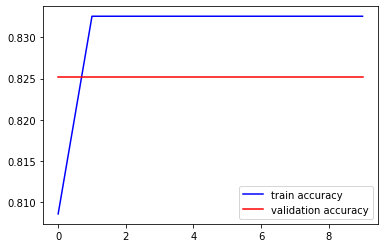

In [40]:
plt.plot(history.history['accuracy'], c='b', label='train accuracy')
plt.plot(history.history['val_accuracy'],
         c='r', label='validation accuracy')
plt.legend(loc='lower right')
plt.show()